In [1]:
from WikiSeriesNN import WikiSeriesNN

from WikiPlot import plot_prediction
from Seq2SeqConv import Seq2SeqConv
from Seq2SeqConvFull import Seq2SeqConvFull
from Seq2Seq import Seq2Seq
from os import path
import pickle
from PerformanceMetrics import smape, smape_batch

import numpy as np

import ipywidgets as widgets

Using TensorFlow backend.


In [2]:
root_folder = "./data"
train_file = path.join(root_folder,"train_meta.pkl")

In [3]:
series = WikiSeriesNN(train_file)

Data ranges from 2015-07-01 to 2017-09-10


In [4]:
seq2seq = Seq2SeqConv(series,60)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60


W0624 14:05:35.452928 4556944832 deprecation_wrapper.py:119] From /Users/maximelovino/Documents/LOCAL_CODE/WikiForecasting/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 14:05:35.466366 4556944832 deprecation_wrapper.py:119] From /Users/maximelovino/Documents/LOCAL_CODE/WikiForecasting/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 14:05:35.469567 4556944832 deprecation_wrapper.py:119] From /Users/maximelovino/Documents/LOCAL_CODE/WikiForecasting/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 14:05:35.984930 4556944832 deprecation_wrapper.py:119] From /Users/maximelovino/Documents/LOCAL_CODE/WikiForecasting/venv/lib/python3.7/site

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          2080      
__________

In [5]:
folder_conv = path.join(root_folder,"conv")
folder_full = path.join(root_folder,"full")

In [6]:
encode_conv = np.load(path.join(folder_conv,"encode.npy"))
target_conv = np.load(path.join(folder_conv,"target.npy"))
prediction_conv = np.load(path.join(folder_conv,"prediction.npy"))

encode_full = np.load(path.join(folder_full,"encode.npy"))
target_full = np.load(path.join(folder_full,"target.npy"))
prediction_full = np.load(path.join(folder_full,"prediction.npy"))

In [7]:
print(encode_conv.shape)
print(target_conv.shape)
print(prediction_conv.shape)
print(encode_full.shape)
print(target_full.shape)
print(prediction_full.shape)

(683, 106328)
(60, 106328)
(60, 106328)
(683, 106328)
(60, 106328)
(60, 106328)


In [8]:
print(smape_batch(target_full,prediction_full,target_full.shape[1]))
print(smape_batch(target_conv,prediction_conv,target_conv.shape[1]))

34.64992075626059
37.29102209099584


In [17]:
remaining_metas = series.meta
langs_names = remaining_metas['lang'].unique()
lang_dropdown = widgets.Dropdown(
    options=langs_names,
    value=langs_names[0],
    description='Lang:',
    disabled=False,
)
lang_dropdown

Dropdown(description='Lang:', options=('zh', 'fr', 'en', 'ru', 'de', 'ja', 'es'), value='zh')

In [18]:
remaining_metas = remaining_metas[remaining_metas['lang'] == lang_dropdown.value]
page_names = remaining_metas['name'].unique()
page_dropdown = widgets.Dropdown(
    options=page_names,
    value=page_names[0],
    description='Page name:',
    disabled=False,
)
page_dropdown

Dropdown(description='Page name:', options=('1984 (roman)', '24 Heures du Mans', '24 Heures du Mans 2016', '2 …

In [19]:
remaining_metas = remaining_metas[remaining_metas['name'] == page_dropdown.value]
accesses_names = remaining_metas['access'].unique()
accesses_dropdown = widgets.Dropdown(
    options=accesses_names,
    value=accesses_names[0],
    description='Access:',
    disabled=False,
)
accesses_dropdown

Dropdown(description='Access:', options=('desktop', 'all-access', 'mobile-web'), value='desktop')

In [20]:
remaining_metas = remaining_metas[remaining_metas['access'] == accesses_dropdown.value]
agent_names = remaining_metas['agent'].unique()
agent_dropdown = widgets.Dropdown(
    options=agent_names,
    value=agent_names[0],
    description='Agent:',
    disabled=False,
)
agent_dropdown

Dropdown(description='Agent:', options=('all-agents',), value='all-agents')

In [21]:
index, meta,_,_ = series.get_sample(page_name=page_dropdown.value,lang=lang_dropdown.value,access=accesses_dropdown.value,agent=agent_dropdown.value)

         name lang   access       agent
3300  Achille   fr  desktop  all-agents


/Users/maximelovino/Documents/LOCAL_CODE/WikiForecasting/WikiSeriesNN.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index = self.meta[self.meta['name'] == page_name][self.meta['lang'] == lang][self.meta['access'] == access][self.meta['agent'] == agent]


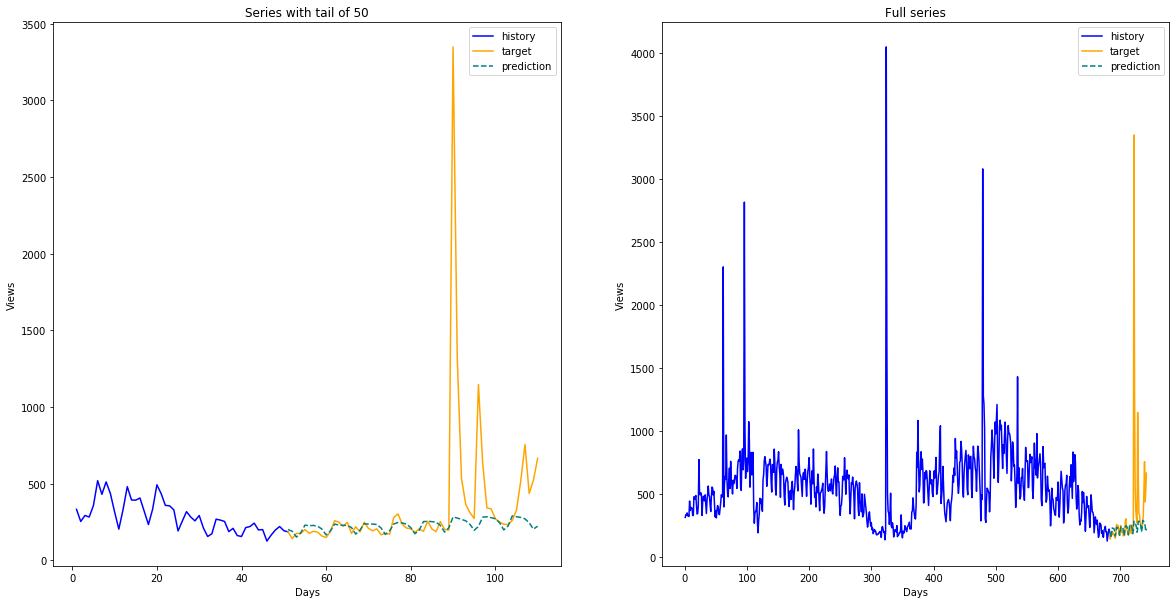

In [22]:
plot_prediction(encode_full[:,index],target_full[:,index],prediction_full[:,index])

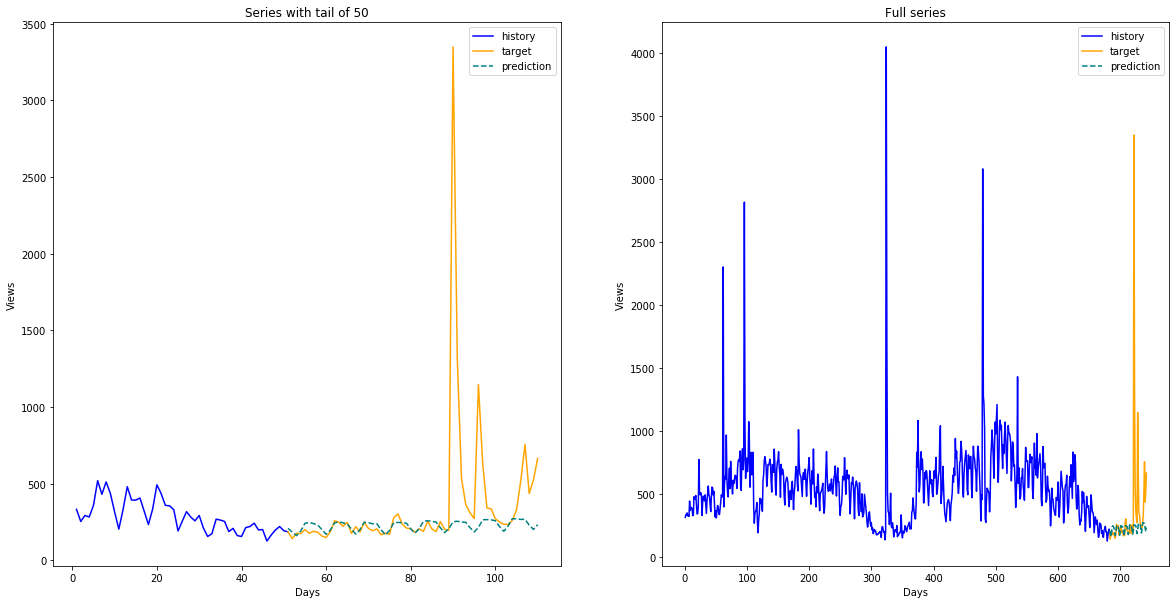

In [23]:
plot_prediction(encode_conv[:,index],target_conv[:,index],prediction_conv[:,index])